In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\lavis\Downloads\dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3272 non-null   object 
 1   Close_AAPL    3272 non-null   float64
 2   High_AAPL     3272 non-null   float64
 3   Low_AAPL      3272 non-null   float64
 4   Open_AAPL     3272 non-null   float64
 5   Volume_AAPL   3272 non-null   int64  
 6   sentiment     3272 non-null   float64
 7   GDP           3211 non-null   float64
 8   CPI           3253 non-null   float64
 9   Unemployment  3253 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 255.8+ KB


In [7]:
df.describe()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,sentiment,GDP,CPI,Unemployment
count,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03,3272.000000,3211.000000,3253.000000,3253.000000
mean,48.837106,49.361432,48.273689,48.813946,2.562707e+08,0.040413,19191.823895,245.677746,6.110667
std,47.212411,47.790602,46.591678,47.184467,2.225648e+08,0.194627,3096.237778,19.537428,2.259949
min,5.771907,5.890620,5.717811,5.781523,3.519590e+07,-0.340000,14980.193000,217.199000,3.500000
25%,16.413700,16.600555,16.281294,16.413009,1.023541e+08,0.000000,16728.687000,231.893000,4.100000
50%,27.036161,27.251451,26.903466,27.095794,1.666698e+08,0.000000,18892.639000,240.222000,5.600000
75%,54.250714,54.928157,53.858818,54.404451,3.456643e+08,0.000000,21684.551000,256.036000,7.800000
max,178.645660,179.558489,175.809091,179.254221,1.880998e+09,0.440400,26272.011000,298.808000,14.800000


In [8]:
#Date column -> DateTime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#Checking for columns with missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

['GDP', 'CPI', 'Unemployment']

In [10]:
#Handling missing values in GDP, CPI and Unemployment Column
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df['CPI'].fillna(df['CPI'].mean(), inplace=True)
df['Unemployment'].fillna(df['Unemployment'].mean(), inplace=True)

C:\Users\lavis\AppData\Local\Temp\ipykernel_24332\2106852823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP'].fillna(df['GDP'].mean(), inplace=True)
C:\Users\lavis\AppData\Local\Temp\ipykernel_24332\2106852823.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
#Verifying changes
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

[]

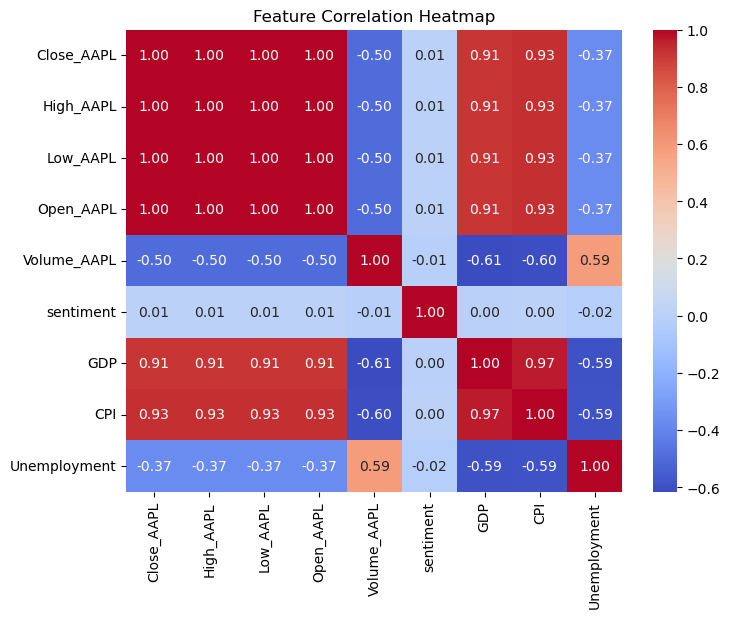

In [13]:
# Computing correlation matrix
corr_matrix = df.drop(columns=["Date"]).corr()

# Ploting heatmap for correlation matrix
# Feature engineering
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [67]:
#Model - splitting data in features
features = ["GDP","CPI"]
target = ["Close_AAPL","Open_AAPL"]

X = df[features]
Y = df[target]

In [76]:
#Model - splitting data into test and train - Close
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [77]:
#Model - checkin size of split data
print("SIZE (X-Train):", X_train.shape)
print("SIZE (X-Test):", X_test.shape)
print("SIZE (y-Train):", y_train.shape)
print("SIZE (y-Test):", y_test.shape)

SIZE (X-Train): (1636, 2)
SIZE (X-Test): (1636, 2)
SIZE (y-Train): (1636, 2)
SIZE (y-Test): (1636, 2)


In [78]:
#Model - Random Forest Regressor - Train and Test
rf_model = RandomForestRegressor(n_estimators=500, max_depth=3, min_samples_split=3, min_samples_leaf=3, max_features='sqrt')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [79]:
#Models Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("R2 Score:",r2_rf)
print("MAE:",mae_rf)

R2 Score: 0.9763946607720899
MAE: 5.347122662429385


In [84]:
X_pred = X_test.copy()
y_pred = y_test.copy()

predictions = rf_model.predict(X_pred)  # Should return shape (n_samples, 2)

# Create comparison DataFrame
comparison_df = X_pred.copy()

# Assign actual values (make sure index aligns)
comparison_df["Close_AAPL"] = y_pred["Close_AAPL"].values
comparison_df["Open_AAPL"] = y_pred["Open_AAPL"].values

# Assign predicted values
comparison_df["Predicted_Close"] = predictions[:, 0]
comparison_df["Predicted_Open"] = predictions[:, 1]

print("Random Samples Comparison:")
comparison_df


Random Samples Comparison:


,GDP,CPI,Close_AAPL,Open_AAPL,Predicted_Close,Predicted_Open
764,16420.419,231.249,15.345199,14.998023,13.686470,13.698571
3038,24777.038,280.806,156.276901,159.447192,155.919626,155.966070
2048,18892.639,249.529,40.648205,40.483256,38.169016,38.149452
2702,21684.551,259.997,111.950539,111.999233,95.306761,95.369047
1684,18892.639,241.176,24.229149,23.588032,27.187983,27.183886
...,...,...,...,...,...,...
1576,18711.702,238.992,24.684258,24.741050,27.089143,27.085244
70,14980.193,217.403,7.481090,7.386719,13.686470,13.698571
2826,22068.767,264.847,118.417267,117.577081,124.432984,124.624799
322,15557.539,224.093,10.102112,10.068751,13.686470,13.698571
